In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.options.display.max_columns = None
pd.options.display.max_rows = None

df = pd.read_csv('Columbia_Cleaned_CLI.csv')
numerical_df = pd.read_csv('Columbia_Cleaned_Dummies_CLI.csv')

df.drop(columns = ['Unnamed: 0'],axis = 1, inplace = True)
numerical_df.drop(columns = ['Unnamed: 0'],axis = 1, inplace = True)

In [80]:
#import sweetviz as sv
#my_eda = sv.analyze(df)
#my_eda.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

<AxesSubplot:>

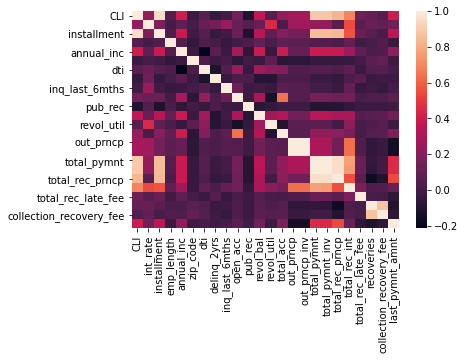

In [81]:
sns.heatmap(df.corr())

In [82]:
#Deciding how to configure and clean the output column
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)'], dtype=object)

In [88]:
#Changing all non-conforming values so that we can execute binary classification
numerical_df['loan_status'] = numerical_df['loan_status'].str.replace('Default', 'Charged Off')
numerical_df['loan_status'] = numerical_df['loan_status'].str.replace('Late (31-120 days)', 'Fully Paid')
numerical_df['loan_status'] = numerical_df['loan_status'].str.replace('Current', 'Fully Paid')

In [ ]:
#Manualy removing the Late (31-120 days) rows because they are not being removed by the other code
numerical_df['loan_status'].value_counts()
numerical_df[numerical_df['loan_status'] == 'Late (31-120 days)']
numerical_df.drop([749,607], axis = 0, inplace = True)

In [89]:
#Defuat/Charge off = 0, Fully paid = 1
numerical_df['loan_status'] = numerical_df['loan_status'].str.replace('Fully Paid','1')
numerical_df['loan_status'] = numerical_df['loan_status'].str.replace('Charged Off','0')
numerical_df['loan_status'] = numerical_df['loan_status'].astype('int')

In [90]:
#Saving Data for model program to use
numerical_df.to_csv('Model_Ready_CLI.csv')

In [91]:
numerical_df

,CLI,int_rate,installment,emp_length,annual_inc,loan_status,zip_code,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,home_MORTGAGE,home_OWN,home_RENT,term_ 36 months,term_ 60 months,grade_A1,grade_A2,grade_A3,grade_A4,grade_A5,grade_B1,grade_B2,grade_B3,grade_B4,grade_B5,grade_C1,grade_C2,grade_C3,grade_C4,grade_C5,grade_D1,grade_D2,grade_D3,grade_D4,grade_D5,grade_E1,grade_E2,grade_E3,grade_E4,grade_E5,grade_F1,grade_F2,grade_F3,grade_F4,grade_F5,grade_G1,grade_G2,grade_G3,grade_G4,verification_Not Verified,verification_Source Verified,verification_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,5000,10.65,162.87,10,24000.00,1,860,27.65,0,1,3,0,13648,83.70,9,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.000000,0.00,0.0000,171.62,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2500,15.27,59.83,0,30000.00,0,309,1.00,0,5,3,0,1687,9.40,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.000000,117.08,1.1100,119.66,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2400,15.96,84.33,10,12252.00,1,606,8.72,0,2,2,0,2956,98.50,10,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.000000,0.00,0.0000,649.91,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,10000,13.49,339.31,10,49200.00,1,917,20.00,0,1,10,0,5598,21.00,37,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,16.970000,0.00,0.0000,357.48,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3000,12.69,67.79,1,80000.00,1,972,17.94,0,0,15,0,27783,53.90,38,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.000000,0.00,0.0000,67.79,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,5000,7.90,156.46,3,36000.00,1,852,11.20,0,3,9,0,7963,28.30,12,0.00,0.00,5631.377753,5631.38,5000.00,631.38,0.000000,0.00,0.0000,161.03,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,7000,15.96,170.08,8,47004.00,1,280,23.51,0,1,7,0,17726,85.60,11,1889.15,1889.15,8136.840000,8136.84,5110.85,3025.99,0.000000,0.00,0.0000,170.08,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7,3000,18.64,109.43,9,48000.00,1,900,5.35,0,2,4,0,8221,87.50,4,0.00,0.00,3938.144334,3938.14,3000.00,938.14,0.000000,0.00,0.0000,111.34,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8,5600,21.28,152.39,4,40000.00,0,958,5.55,0,2,11,0,5210,32.60,13,0.00,0.00,646.020000,646.02,162.02,294.94,0.000000,189.06,2.0900,152.39,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9,5375,12.69,121.45,0,15000.00,0,774,18.08,0,0,2,0,9279,36.50,3,0.00,0.00,1476.190000,1469.34,673.48,533.42,0.000000,269.29,2.5200,121.45,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
